In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve, auc)
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [5]:
df=pd.read_csv("telecom_churn.csv")
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'InternetService', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Timestamp'],
      dtype='object')

In [6]:
df['TotalCharges'].isnull().sum()

np.int64(19743)

In [7]:
df['TotalCharges'].dtype

dtype('O')

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
median_value = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_value)

,TotalCharges
0,2007.08
1,2161.36
2,4224.95
3,1340.09
4,2280.05
...,...
99995,2007.08
99996,3534.35
99997,4739.00
99998,526.29


In [9]:
df.isnull().sum()

,0
CustomerID,0
Gender,18213
SeniorCitizen,18139
Partner,18006
Dependents,17997
Tenure,17999
PhoneService,17904
InternetService,18421
MonthlyCharges,18096
TotalCharges,20591


In [10]:
df=df.fillna(df.median(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [11]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
InternetService,0
MonthlyCharges,0
TotalCharges,0


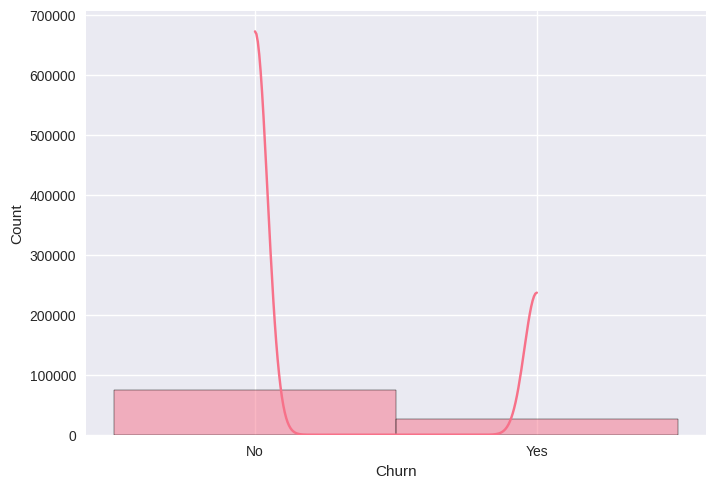

,count
Churn,
No,73956
Yes,26044


In [12]:
sns.histplot(df['Churn'],kde=True)
plt.show()
df['Churn'].value_counts()

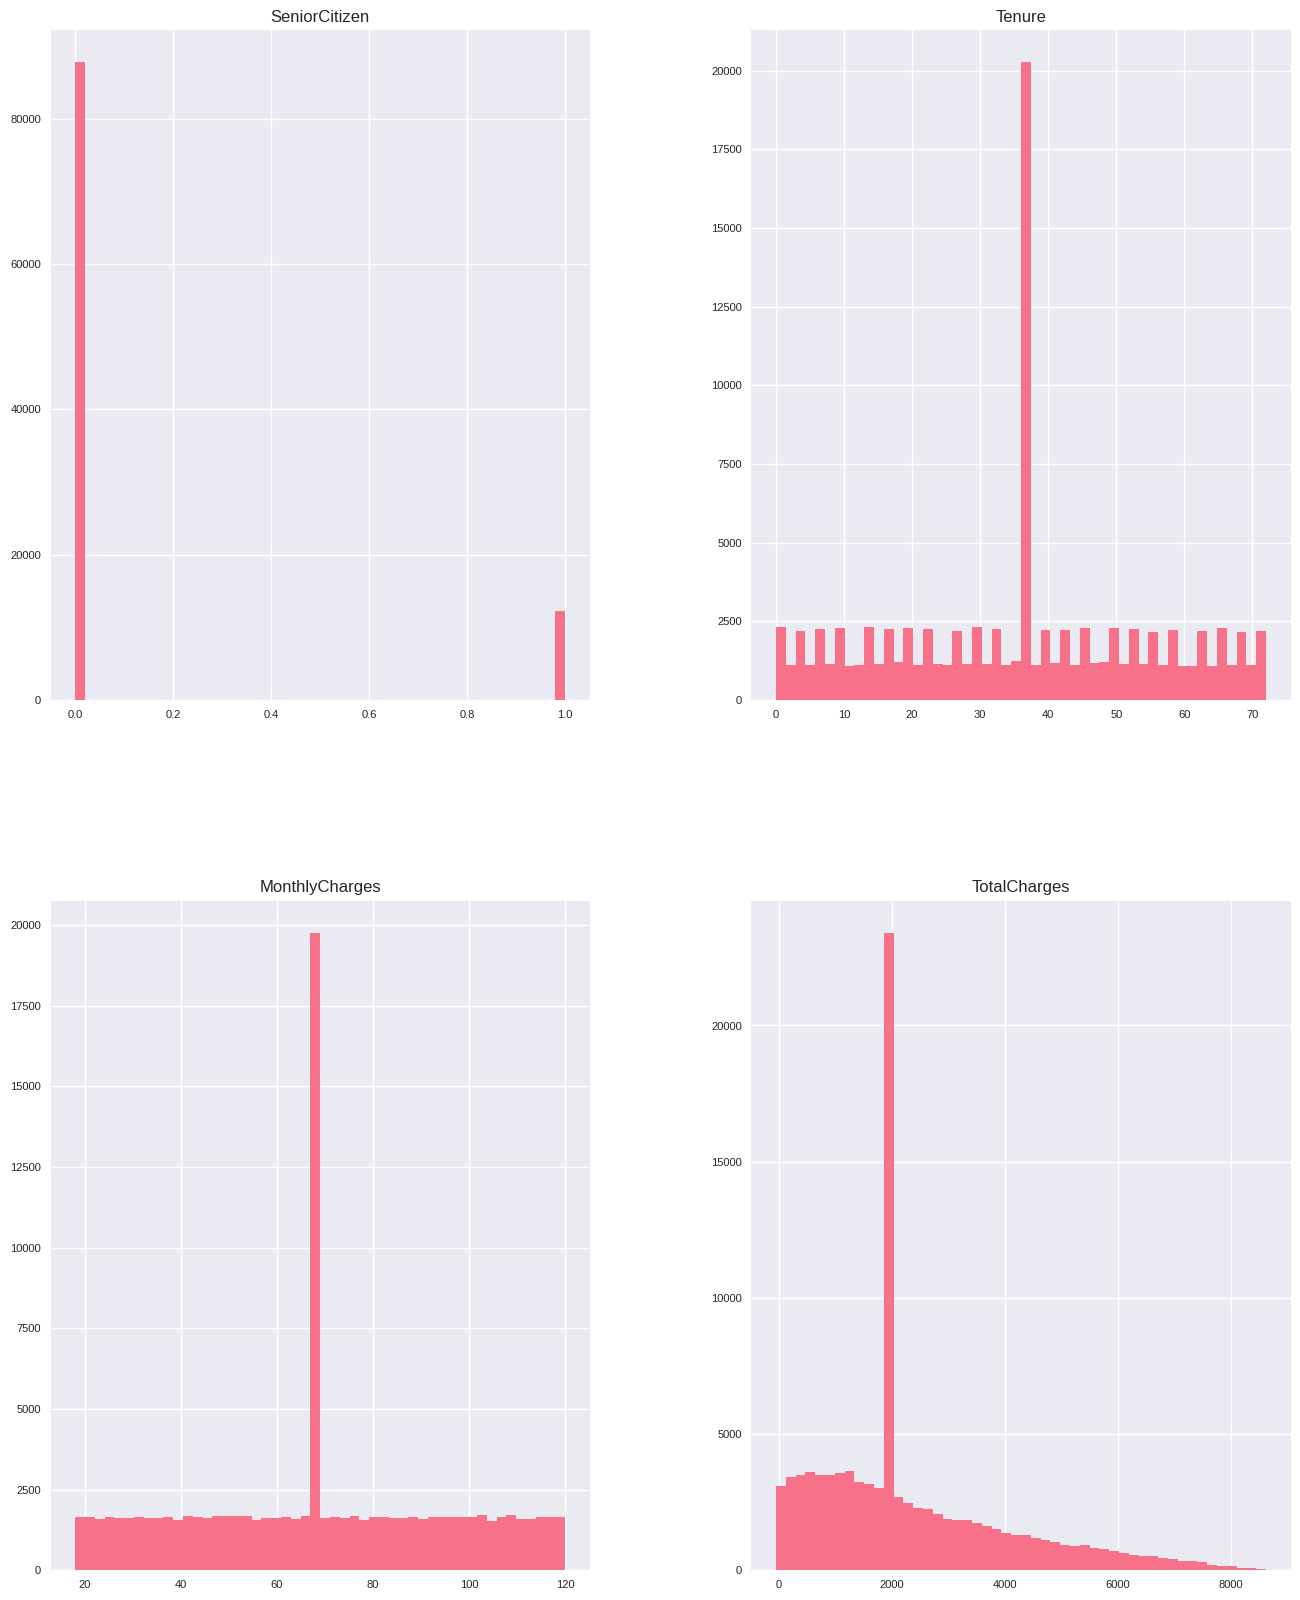

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
print(df.dtypes)

CustomerID          object
Gender              object
SeniorCitizen      float64
Partner             object
Dependents          object
Tenure             float64
PhoneService        object
InternetService     object
MonthlyCharges     float64
TotalCharges       float64
Churn               object
Timestamp           object
dtype: object


In [15]:
df_subset = df.drop(columns=['CustomerID', 'Timestamp'])
df_encoded = pd.get_dummies(df_subset, drop_first=True)
#a=pd.get_dummies(df[['CustomerID','Gender','Partner','Dependents','PhoneService','InternetService','Timestamp','Churn']])

In [16]:
corr_df=df_encoded.corr()
corr_df

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Churn_Yes
SeniorCitizen,1.000000,-0.002039,-0.001460,-0.003718,0.000673,-0.002697,0.003476,-0.002599,-0.003544,-0.000459,0.002249
Tenure,-0.002039,1.000000,-0.001116,0.611161,0.000774,0.005128,-0.002870,0.001766,0.000458,0.001187,-0.001740
MonthlyCharges,-0.001460,-0.001116,1.000000,0.443421,-0.004699,-0.002583,0.004146,0.004020,0.000984,-0.000689,0.001741
TotalCharges,-0.003718,0.611161,0.443421,1.000000,-0.006159,0.004008,-0.000035,0.003603,0.005309,-0.006665,0.001487
Gender_Male,0.000673,0.000774,-0.004699,-0.006159,1.000000,0.003492,0.005085,0.000300,-0.000432,0.002302,0.000561
Partner_Yes,-0.002697,0.005128,-0.002583,0.004008,0.003492,1.000000,-0.000126,0.005206,-0.001908,-0.002200,0.000639
Dependents_Yes,0.003476,-0.002870,0.004146,-0.000035,0.005085,-0.000126,1.000000,-0.001493,0.001935,0.002824,0.000650
PhoneService_Yes,-0.002599,0.001766,0.004020,0.003603,0.000300,0.005206,-0.001493,1.000000,-0.001505,0.005166,0.003068
InternetService_Fiber optic,-0.003544,0.000458,0.000984,0.005309,-0.000432,-0.001908,0.001935,-0.001505,1.000000,-0.532742,-0.000788
InternetService_No,-0.000459,0.001187,-0.000689,-0.006665,0.002302,-0.002200,0.002824,0.005166,-0.532742,1.000000,-0.004311


In [17]:
corr_yes_chur = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

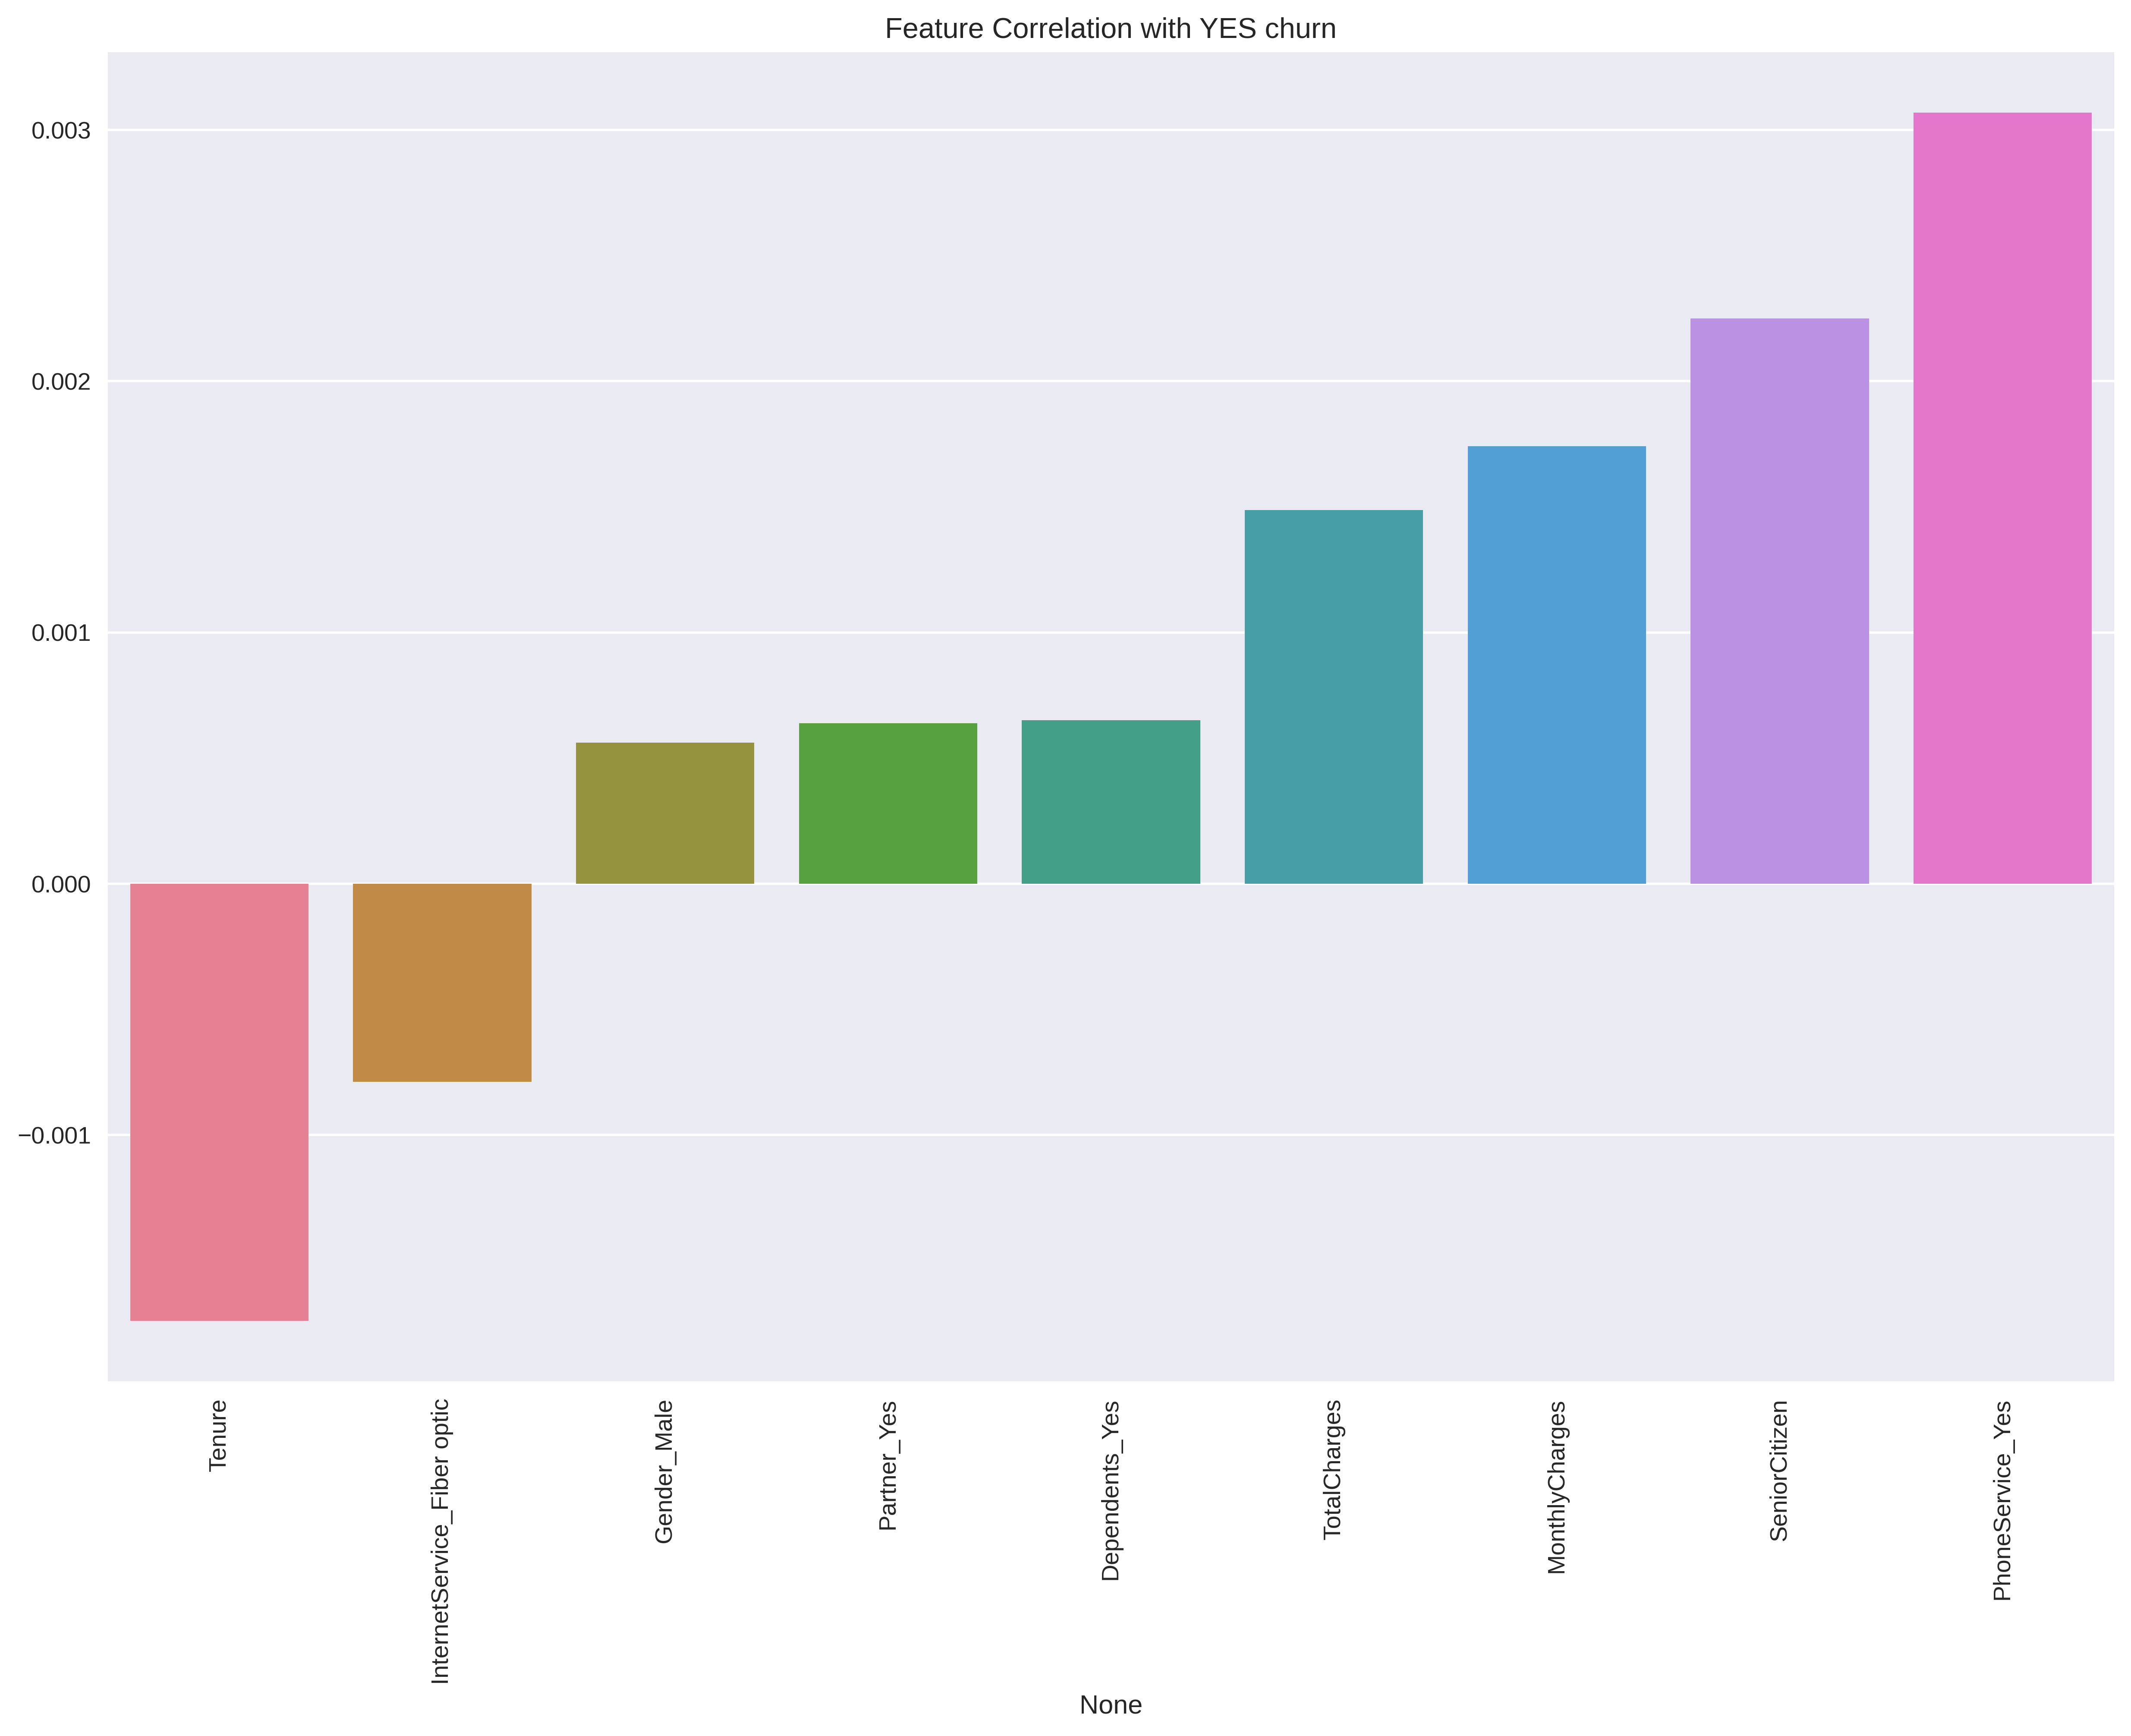

In [18]:
colors = sns.color_palette("husl", len(corr_yes_chur))
plt.figure(figsize=(15,10),dpi=400)
plt.title('Feature Correlation with YES churn')
sns.barplot(x=corr_yes_chur.index,y=corr_yes_chur.values,palette=colors)
plt.xticks(rotation=90);

## Key Findings from (EDA)

*   **Target Variable Distribution:** The 'Churn' column shows a clear imbalance, with significantly more customers who did not churn ('No') compared to those who did ('Yes').
*   **Numerical Feature Distributions:**
SeniorCitizen: The histogram shows a large number of customers are not senior citizens and a smaller number are.
MonthlyCharges: The distribution of monthly charges have multiple peaks
TotalCharges: This is right-skewed, with a large number of customers having lower total charges and fewer customers with very high total charges.
*   **Feature Correlation with Churn:** 'PhoneService_Yes', 'SeniorCitizen', 'MonthlyCharges', and 'TotalCharges' showed slightly positive correlations with 'Churn', while 'Tenure' and 'InternetService_Fiber optic' showed slightly negative correlations.

**Task 2**

In [19]:
# Calculate AverageMonthlySpend, handling cases where Tenure is 0
df['AverageMonthlySpend'] = df.apply(lambda row: row['TotalCharges'] / row['Tenure'] if row['Tenure'] != 0 else 0, axis=1)
display(df[['TotalCharges', 'Tenure', 'AverageMonthlySpend']].head())

,TotalCharges,Tenure,AverageMonthlySpend
0,2007.08,26.0,77.195385
1,2161.36,36.0,60.037778
2,4224.95,36.0,117.359722
3,1340.09,44.0,30.456591
4,2280.05,29.0,78.622414


In [20]:
df['IsNewCustomer'] = (df['Tenure'] < 6).astype(int)

**JUSTIFICATION**
* Avg_montly_spend gives us a better understanding of a
customer's spending habits on a per-month basis, which reveals patterns related to churn.

* By creating a 'IsNewCustomer' (indicating if tenure is less than 6 months), we can analyze if new customers have a higher chances to churn.

In [21]:
X = df.drop(columns=['Churn', 'CustomerID', 'Timestamp'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [25]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'Tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AverageMonthlySpend',
                                                   'IsNewCustomer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'InternetService'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [26]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['SeniorCitizen',
                                                                          'Tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AverageMonthlySpend',
                                                                          'IsNewCustomer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'InternetService'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='f1_weighted', verbose=2)

In [27]:
logr_pred=grid_search.predict(X_test)
grid_search.best_params_


{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

In [28]:
grid_search.best_score_

np.float64(0.5282996728430283)

In [29]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58     14753
           1       0.26      0.53      0.35      5247

    accuracy                           0.49     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.61      0.49      0.52     20000



In [30]:
rf = RandomForestClassifier()

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

param_grid = {'classifier__n_estimators':[15,30,45,60,75,90,100,125,150],
             'classifier__max_depth':[1,5,10,20],
             'classifier__max_features':['sqrt','log2']
             }

grid_rf_model = GridSearchCV(pipeline_rf, param_grid,scoring='f1_weighted',
                             cv=5, verbose=2, n_jobs=-1)

grid_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['SeniorCitizen',
                                                                          'Tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AverageMonthlySpend',
                                                                          'IsNewCustomer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'InternetService'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [1, 5, 10, 20],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [15, 30, 45, 60, 75, 90,
                                                      100, 125, 150]},
             scoring='f1_weighted', verbose=2)

In [31]:
rf_pred = grid_rf_model.predict(X_test)
grid_rf_model.best_params_

{'classifier__max_depth': 20,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 15}

In [32]:
grid_rf_model.best_score_

np.float64(0.6338593087613419)

In [33]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     14753
           1       0.24      0.02      0.03      5247

    accuracy                           0.73     20000
   macro avg       0.49      0.50      0.44     20000
weighted avg       0.61      0.73      0.63     20000



In [34]:
gd = GradientBoostingClassifier(n_estimators=100,max_depth=6,min_samples_split=3,
                               min_samples_leaf=5,max_features='sqrt')

pipeline_gd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gd)
])

pipeline_gd.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'Tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AverageMonthlySpend',
                                                   'IsNewCustomer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'InternetService'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=6, max_features='sqrt',
                                            min_samples_leaf=5,
                                            min_samples_split=3))])

In [35]:
gd_pred = pipeline_gd.predict(X_test)

In [36]:
print(classification_report(y_test,gd_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     14753
           1       0.22      0.00      0.00      5247

    accuracy                           0.74     20000
   macro avg       0.48      0.50      0.42     20000
weighted avg       0.60      0.74      0.63     20000



In [37]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [38]:
smote_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)

In [39]:
print("F1 Score (Baseline):", f1_score(y_test, logr_pred))
print("F1 Score (SMOTE):", f1_score(y_test, y_pred_smote))

F1 Score (Baseline): 0.3506197824437136
F1 Score (SMOTE): 0.3513242123760512


The F1 score improved slightly from 0.3506 to 0.3513 after applying SMOTE. This tells us that model improved w.r.t minority class more effectivly.

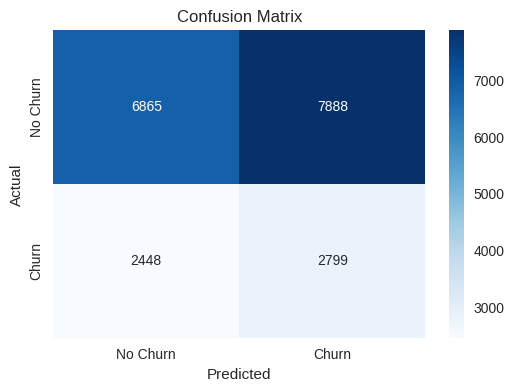

In [42]:
cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**False Positive**
Predicted churn, but customer wouldn’t have left.

**False Negative**
Predicted no churn, but customer actually left.

False Negative is worse because of loss of customer.
False Positives is waste of resources here, but False Negatives cost relationships and revenue.